## Bibliotecas

In [6]:
! pip install matplotlib
! pip install seaborn

import pandas as pd
from pathlib import Path
import seaborn as sns


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Organizando df

c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\01dadosevisualizacao\ml-latest-small\ratings.csv


c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='nota'>

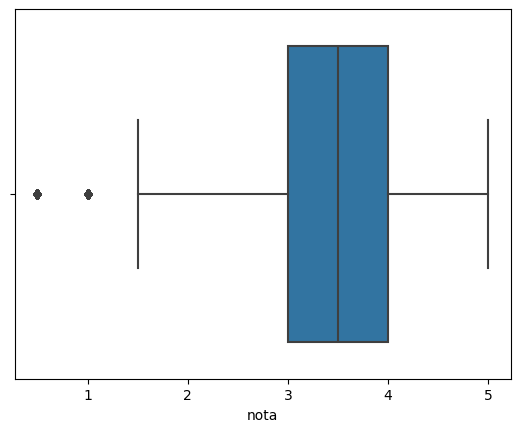

In [7]:


# colunas sao atributos/ chaves de dicionarios no dataframe
PATH_CSVS = Path.cwd()
print(PATH_CSVS / 'ml-latest-small' / 'ratings.csv')
notas = pd.read_csv(PATH_CSVS / 'ml-latest-small' / 'ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
#notas.nota.plot(kind='hist')
sns.boxplot(x=notas.nota)

## Exploracao Inicial

In [8]:
notas.nota.mean()


3.501556983616962

In [9]:
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
notas_1 = notas.query('filmeId==1 or filmeId==2')
notas_1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


In [11]:
filmes.query('"Adventure" in generos')

,filmeId,titulo,generos
721,941,"Mark of Zorro, The (1940)",Adventure
1865,2477,Firewalker (1986),Adventure
1912,2537,Beyond the Poseidon Adventure (1979),Adventure
3633,4988,White Water Summer (1987),Adventure
3822,5357,Iron Will (1994),Adventure
3823,5358,Mountains of the Moon (1990),Adventure
3824,5361,White Fang (1991),Adventure
4827,7205,"Wind and the Lion, The (1975)",Adventure
7109,70703,Christopher Columbus: The Discovery (1992),Adventure
7936,95717,Treasure Island (2012),Adventure


In [12]:
notass = notas.groupby('filmeId').mean()

notass['nota'].values


array([3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
       4.        ])

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

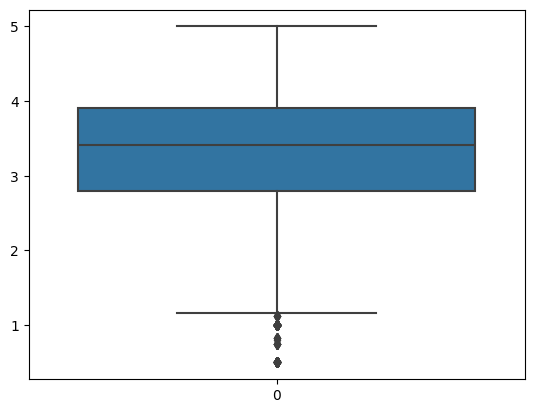

In [13]:
sns.boxplot(notass.nota.values)
notass.nota.describe()


c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


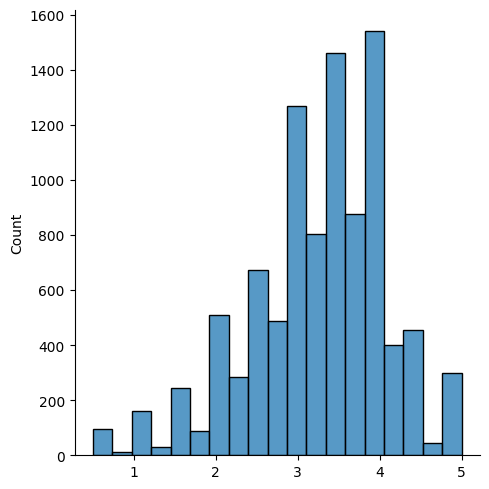

In [14]:
sns.displot(notass.nota.values,bins=19)

##  Tipos de Variaveis(tdmb 5000)

In [15]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Original_Language

- Categoria Nominal -> nao possui ordenacao

In [16]:
movies['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='language', ylabel='total'>

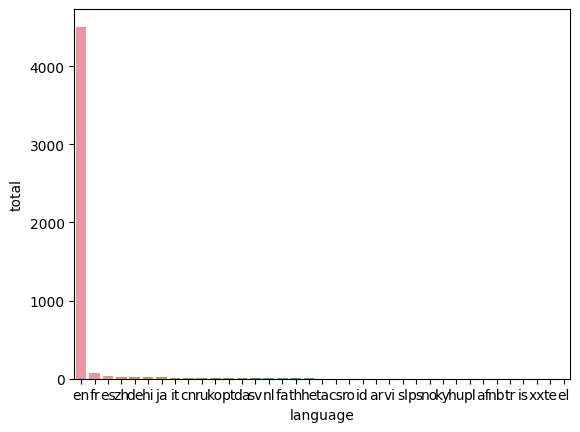

In [17]:
languages=movies['original_language'].value_counts().to_frame().reset_index()
languages.columns=['language','total']
languages
sns.barplot(x='language',y='total',data = languages)


In [33]:
x=movies['production_countries'].tolist()
df = pd.read_json(x)
x=df['iso_3166_1'].unique()
#movies['production_countries']=x
sns.catplot(data=movies,x='original_language',y='production_countries')

ValueError: Invalid file path or buffer object type: <class 'list'>